# Описание задачи
Необходимо проанализировать по имеющимся данным, примет ли кандидат на должность предложение о работе. Для этого нужно визуализировать данные, вычислить основные характеристики, убедиться, что пропущенных значений нет, провести нормализацию, разбить данные на обучающую и тестовые выборки и решить задачу классификации.

# Устанавливаем необходимые зависимости
- numpy
- matplotlib
- pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Загружаем данные

In [2]:
data = pd.read_csv('./hr_data.csv', sep=',', header=0, engine='python')
data

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


In [3]:
data.tail()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined


In [4]:
data.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


# Описание датасета

Этот датасет был частью процесса подбора персонала для конкретного клиента ScaleneWorks. ScaleneWorks оказывает поддержку нескольким компаниям в области информационных технологий в Индии в привлечении талантов. Одна из проблем, с которыми они сталкиваются, заключается в том, что около 30% кандидатов, которые принимают предложение о работе, не присоединяются к компании, это приводит к огромной потере доходов и времени, поскольку компании снова инициируют процесс найма, чтобы удовлетворить спрос на рабочую силу.

SceleneWorks хочет выяснить, можно ли построить модель для прогнозирования вероятности присоединился ли кандидат в конце концов к компании или нет.

Выведем размерность датасета

In [5]:
print(data.shape)

(8995, 18)


Выясним параметры датасета для их дальнейшего описания

In [6]:
print(data.columns)

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')


# Описание параметров

- `SLNO` - Номер предложения кандидату
- `Candidate` - Уникальный идентификационный номер для идентификации кандидата
- `DOJ Extended` - Запрошена ли дата вступления на работу кандидатом
- `Duration to accept the offer` - Количество дней, затраченных кандидатом на принятие предложения
- `Notice period` - Срок уведомления до того, как кондидат сможет присоединиться к компании
- `Offered band` - Группа, предлагаемая кандидату на основе опыта, производительности
- `Percent hike expected in CTC` - Процентное повышение, ожидаемое кандидатом
- `Percent hike offered in CTC` - Процентное повышение, предлагаемое компанией
- `Percent difference CTC` - Разница между ожидаемым и предлагаемым повышением
- `Joining Bonus` - Предоставляется ли бонус за вступление
- `Candidate relocate actual` - Должен ли переехать кандидат
- `Gender` - Пол кандидата
- `Candidate Source` - Источник, из которого было получено резюме кандидата
- `Rex in Yrs` - Соответствующий многолетний опыт
- `LOB` - Направление деятельности, для которого было развернуто предложение
- `Location` - Местоположение компании, для которой было развернуто предложение
- `Age` - Возраст кандидата
- `Status` - Целевая переменная, принял предложение кандидат или нет

In [7]:
print(data.index)

RangeIndex(start=0, stop=8995, step=1)


Описательная статистика датасета (количество не NULL значений, максимальное значение, минимальное значение и т.д.) для всех параметров

In [8]:
data.describe(include='all')

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
count,8995.000000,8.995000e+03,8995,8995.000000,8995.000000,8995,8995.000000,8995.000000,8995.000000,8995,8995,8995,8995,8995.000000,8995,8995,8995.000000,8995
unique,NaN,NaN,2,NaN,NaN,4,NaN,NaN,NaN,2,2,2,3,NaN,9,11,NaN,2
top,NaN,NaN,No,NaN,NaN,E1,NaN,NaN,NaN,No,No,Male,Direct,NaN,INFRA,Chennai,NaN,Joined
freq,NaN,NaN,4788,NaN,NaN,5568,NaN,NaN,NaN,8578,7705,7444,4801,NaN,2850,3150,NaN,7313
mean,5970.984325,2.843647e+06,NaN,21.434464,39.291829,NaN,43.864804,40.657356,-1.573802,NaN,NaN,NaN,NaN,4.239022,NaN,NaN,29.913174,NaN
std,3373.963454,4.863448e+05,NaN,25.811616,22.220239,NaN,29.788975,36.064060,19.610729,NaN,NaN,NaN,NaN,2.547571,NaN,NaN,4.097912,NaN
min,1.000000,2.109586e+06,NaN,0.000000,0.000000,NaN,-68.830000,-60.530000,-67.270000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN
25%,3207.500000,2.386476e+06,NaN,3.000000,30.000000,NaN,27.270000,22.090000,-8.330000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,27.000000,NaN
50%,5976.000000,2.807482e+06,NaN,10.000000,30.000000,NaN,40.000000,36.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,29.000000,NaN
75%,8739.000000,3.300060e+06,NaN,33.000000,60.000000,NaN,53.850000,50.000000,0.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,34.000000,NaN


Аналогично для только числовых параметров

In [9]:
data.describe()

,SLNO,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8995.000000,8.995000e+03,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,5970.984325,2.843647e+06,21.434464,39.291829,43.864804,40.657356,-1.573802,4.239022,29.913174
std,3373.963454,4.863448e+05,25.811616,22.220239,29.788975,36.064060,19.610729,2.547571,4.097912
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3207.500000,2.386476e+06,3.000000,30.000000,27.270000,22.090000,-8.330000,3.000000,27.000000
50%,5976.000000,2.807482e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,8739.000000,3.300060e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


Аналогично для только категориальных параметров

In [10]:
data.describe(include='object')

,DOJ Extended,Offered band,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,LOB,Location,Status
count,8995,8995,8995,8995,8995,8995,8995,8995,8995
unique,2,4,2,2,2,3,9,11,2
top,No,E1,No,No,Male,Direct,INFRA,Chennai,Joined
freq,4788,5568,8578,7705,7444,4801,2850,3150,7313


Матрица графиков рассеивания

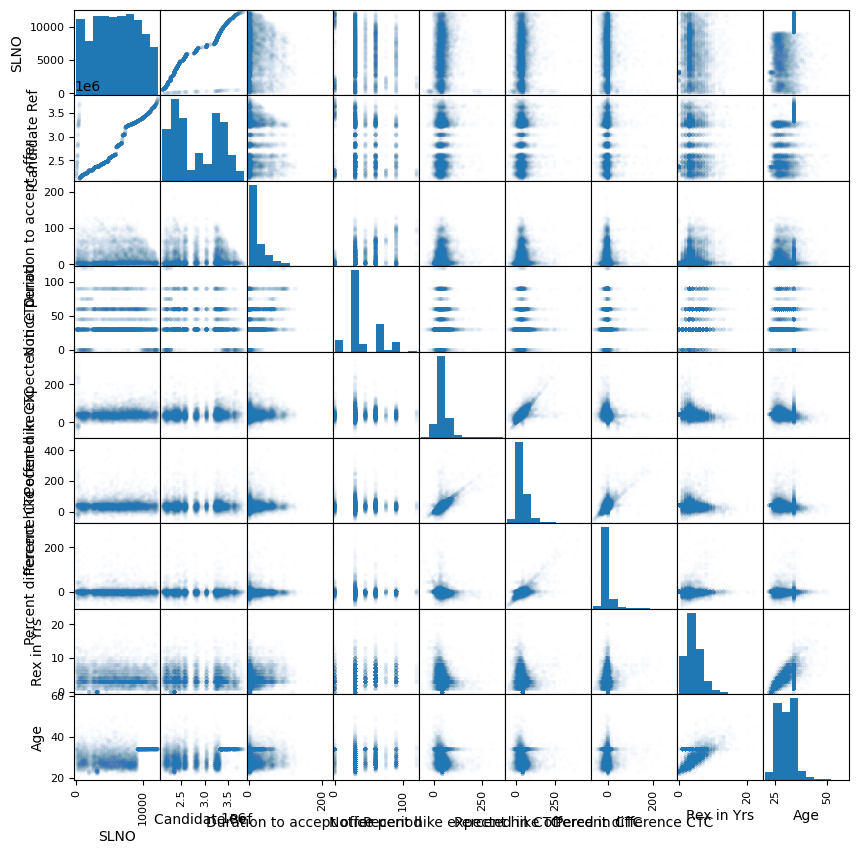

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Матрица корреляции для числовых признаков

In [12]:
data.corr()

C:\Users\1\AppData\Local\Temp\ipykernel_5892\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SLNO,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
SLNO,1.000000,0.898788,-0.030136,-0.098491,0.048984,0.018101,-0.043523,-0.061839,0.318025
Candidate Ref,0.898788,1.000000,-0.030752,-0.120810,0.077124,0.044828,-0.016667,-0.047440,0.306520
Duration to accept offer,-0.030136,-0.030752,1.000000,0.363760,0.018821,0.007307,-0.009395,0.113951,0.020131
Notice period,-0.098491,-0.120810,0.363760,1.000000,-0.005262,-0.013458,-0.015067,0.181786,-0.004967
Pecent hike expected in CTC,0.048984,0.077124,0.018821,-0.005262,1.000000,0.668594,-0.161501,-0.217391,-0.137705
Percent hike offered in CTC,0.018101,0.044828,0.007307,-0.013458,0.668594,1.000000,0.598779,-0.110243,-0.080010
Percent difference CTC,-0.043523,-0.016667,-0.009395,-0.015067,-0.161501,0.598779,1.000000,0.081547,0.037955
Rex in Yrs,-0.061839,-0.047440,0.113951,0.181786,-0.217391,-0.110243,0.081547,1.000000,0.568228
Age,0.318025,0.306520,0.020131,-0.004967,-0.137705,-0.080010,0.037955,0.568228,1.000000


Видна зависимость между параметрами `Age` (возраст кандидата) и `Rex in Yrs` (соответствующий многолетний опыт), что логично (чем больше у людей соответствующий опыт, тем они старше)

Для наглядности, визуализируем данную зависимость

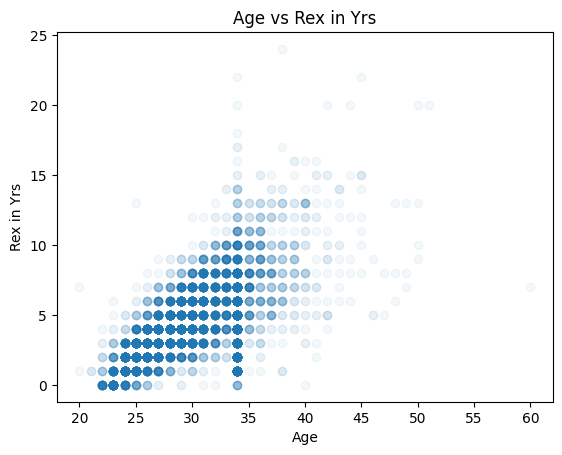

In [13]:
plt.plot(data['Age'], data['Rex in Yrs'], 'o', alpha = 0.05)
plt.xlabel('Age')
plt.ylabel('Rex in Yrs')
plt.title('Age vs Rex in Yrs')
pass

Выведем уникальные значения для некоторых категориальных параметров

In [14]:
data['Location'].unique()

array(['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Kolkata',
       'Cochin', 'Pune', 'Others', 'Mumbai', 'Ahmedabad'], dtype=object)

In [15]:
data['LOB'].unique()

array(['ERS', 'INFRA', 'Healthcare', 'BFSI', 'CSMP', 'ETS', 'AXON', 'EAS',
       'MMS'], dtype=object)

In [16]:
data['Candidate Source'].unique()

array(['Agency', 'Employee Referral', 'Direct'], dtype=object)

# Подготовка данных

Уберем признаки `SLNO` и `Candidate Ref`, т.к. они являются порядковыми индексами

In [17]:
data = data.drop(['SLNO', 'Candidate Ref'], axis=1)

In [18]:
data

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


Разделим признаки на числовые и категориальные

In [19]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['DOJ Extended', 'Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status']
['Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']


Выделим среди категориальных признаков бинарные и небинарные, для этого выясним уникальные значения каждого категориального признака

In [20]:
for c in categorical_columns:
    print(c, data[c].unique())

DOJ Extended ['Yes' 'No']
Offered band ['E2' 'E1' 'E3' 'E0']
Joining Bonus ['No' 'Yes']
Candidate relocate actual ['No' 'Yes']
Gender ['Female' 'Male']
Candidate Source ['Agency' 'Employee Referral' 'Direct']
LOB ['ERS' 'INFRA' 'Healthcare' 'BFSI' 'CSMP' 'ETS' 'AXON' 'EAS' 'MMS']
Location ['Noida' 'Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Kolkata' 'Cochin'
 'Pune' 'Others' 'Mumbai' 'Ahmedabad']
Status ['Joined' 'Not Joined']


In [21]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

['DOJ Extended', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Status'] ['Offered band', 'Candidate Source', 'LOB', 'Location']


По количеству непустых ячеек определим, есть ли пропущенные значения

In [22]:
data.count()

DOJ Extended                   8995
Duration to accept offer       8995
Notice period                  8995
Offered band                   8995
Pecent hike expected in CTC    8995
Percent hike offered in CTC    8995
Percent difference CTC         8995
Joining Bonus                  8995
Candidate relocate actual      8995
Gender                         8995
Candidate Source               8995
Rex in Yrs                     8995
LOB                            8995
Location                       8995
Age                            8995
Status                         8995
dtype: int64

Пропущенных значений нет

Применим метод векторизации для категориальных признаков

In [23]:
data_binary = pd.get_dummies(data[binary_columns], drop_first=True)
print(data_binary.columns)

Index(['DOJ Extended_Yes', 'Joining Bonus_Yes',
       'Candidate relocate actual_Yes', 'Gender_Male', 'Status_Not Joined'],
      dtype='object')


In [24]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Offered band_E0', 'Offered band_E1', 'Offered band_E2',
       'Offered band_E3', 'Candidate Source_Agency', 'Candidate Source_Direct',
       'Candidate Source_Employee Referral', 'LOB_AXON', 'LOB_BFSI',
       'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Noida', 'Location_Others', 'Location_Pune'],
      dtype='object')


Нормализуем количественные признаки для улучшения работы некоторых алгоритмов машинного обучения

In [25]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,21.434464,39.291829,43.864804,40.657356,-1.573802,4.239022,29.913174
std,25.811616,22.220239,29.788975,36.064060,19.610729,2.547571,4.097912
min,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3.000000,30.000000,27.270000,22.090000,-8.330000,3.000000,27.000000
50%,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


In [26]:
data_numerical = (data_numerical - data_numerical.mean(axis=0))/data_numerical.std(axis=0)

In [27]:
data_numerical.describe()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03
mean,5.687502e-17,-8.847225e-17,-5.055557e-17,1.184896e-17,1.579862e-17,-6.319446e-18,-2.527778e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.304193e-01,-1.768290e+00,-3.783104e+00,-2.805767e+00,-3.350013e+00,-1.663947e+00,-2.419079e+00
25%,-7.141925e-01,-4.181696e-01,-5.570787e-01,-5.148438e-01,-3.445154e-01,-4.863542e-01,-7.108923e-01
50%,-4.429968e-01,-4.181696e-01,-1.297394e-01,-1.291412e-01,8.025210e-02,-9.382338e-02,-2.228388e-01
75%,4.480749e-01,9.319509e-01,3.351977e-01,2.590569e-01,8.025210e-02,6.912383e-01,9.972947e-01
max,7.847844e+00,3.632192e+00,1.060477e+01,1.194465e+01,1.537800e+01,7.756793e+00,7.341989e+00


Соединяем все в одну таблицу

In [28]:
data = pd.concat((data_numerical, data_nonbinary, data_binary), axis=1)
print(data.shape)

(8995, 39)


In [29]:
data.describe()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Offered band_E0,Offered band_E1,Offered band_E2,...,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,DOJ Extended_Yes,Joining Bonus_Yes,Candidate relocate actual_Yes,Gender_Male,Status_Not Joined
count,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8.995000e+03,8995.000000,8995.000000,8995.000000,...,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,5.687502e-17,-8.847225e-17,-5.055557e-17,1.184896e-17,1.579862e-17,-6.319446e-18,-2.527778e-17,0.023457,0.619011,0.301390,...,0.014341,0.021901,0.303168,0.001445,0.005336,0.467704,0.046359,0.143413,0.827571,0.186993
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.151360,0.485657,0.458887,...,0.118900,0.146369,0.459653,0.037991,0.072859,0.498984,0.210273,0.350513,0.377774,0.389927
min,-8.304193e-01,-1.768290e+00,-3.783104e+00,-2.805767e+00,-3.350013e+00,-1.663947e+00,-2.419079e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.141925e-01,-4.181696e-01,-5.570787e-01,-5.148438e-01,-3.445154e-01,-4.863542e-01,-7.108923e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-4.429968e-01,-4.181696e-01,-1.297394e-01,-1.291412e-01,8.025210e-02,-9.382338e-02,-2.228388e-01,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.480749e-01,9.319509e-01,3.351977e-01,2.590569e-01,8.025210e-02,6.912383e-01,9.972947e-01,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,7.847844e+00,3.632192e+00,1.060477e+01,1.194465e+01,1.537800e+01,7.756793e+00,7.341989e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

Разбиваем данные на X и y

In [30]:
X = data.drop('Status_Not Joined', axis=1)
y = data['Status_Not Joined']
feature_names = X.columns

In [31]:
type(feature_names)

pandas.core.indexes.base.Index

In [32]:
feature_names

Index(['Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Percent difference CTC', 'Rex in Yrs', 'Age', 'Offered band_E0',
       'Offered band_E1', 'Offered band_E2', 'Offered band_E3',
       'Candidate Source_Agency', 'Candidate Source_Direct',
       'Candidate Source_Employee Referral', 'LOB_AXON', 'LOB_BFSI',
       'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Noida', 'Location_Others', 'Location_Pune',
       'DOJ Extended_Yes', 'Joining Bonus_Yes',
       'Candidate relocate actual_Yes', 'Gender_Male'],
      dtype='object')

In [33]:
X = X.to_numpy()

In [34]:
y = y.to_numpy()

In [35]:
print(X.shape)
print(y.shape)
N, d = X.shape

(8995, 38)
(8995,)


# Разбиваем на тестовую и обучающую выборки

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6296 2699


# Обучение

# kNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.19525750277880696

In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[2127   54]
 [ 473   45]]


Подбор параметров

In [40]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.18233502409973001 45


In [41]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.18074968233799238 0.1915524268247499


# SVC

In [42]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.1840851334180432 0.19192293442015562


Подбор параметров

In [43]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.1801142917178925 1.0


In [44]:
svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.18074968233799238 0.1915524268247499


# Random Forest

In [54]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.003211859172328598 0.18777777777777777


# Extremely Randomized Trees

In [46]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0025412960609911056 0.19859207113745833


# AdaBoost

In [47]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.15771918678526048 0.1852537977028529


# GBT

In [48]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.08195679796696315 0.18932938125231566
